In [2]:
import sys

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
# import image
img1 = cv2.imread('samples/1.jpg')

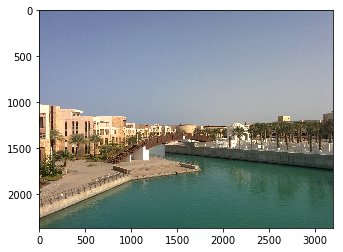

In [12]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

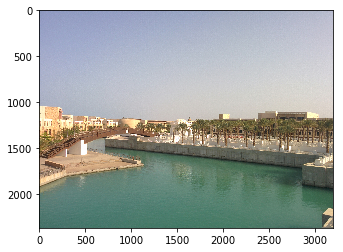

In [13]:
img2 = cv2.imread('samples/2.jpg')
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [14]:
img2 = cv2.imread('samples/3.jpg')
plt.imshow(cv2.cvtColor(img3, cv3.COLOR_BGR2RGB))

NameError: name 'cv3' is not defined